# <center>CMSE 202 Final Project</center>

# ___How have carbon emissions affected climate change?___

## _Group Members: Peter Fu Chen, Riley Millikan, Mike Liu, Alex Tran, Trevor Parcella_

_Background and Motivation:_

_The purpose of this project is to explore the relationship between carbon emissions and climate change. Carbon emissions are known to be a leading contributor to climate change, which has significant impacts on the environment and human society. Therefore, understanding the relationship between these two variables is crucial._

_Project Overview:_

_The project will analyze the historical trends of carbon emissions and climate change. The following aspects will be examined:_

- The relationship between carbon emissions and rising temperatures
- The impact of carbon emissions on extreme weather events
- The role of carbon emissions in sea level rise

_Goals:_

- Analyze historical trends in carbon emissions and climate change
- Examine the relationship between carbon emissions and various climate variables, such as temperature, extreme weather events, sea level, and ocean acidity
- Create visualizations to illustrate findings
- Draw conclusions about the impact of carbon emissions on climate change

## Methodology

### This research is carried out from the following aspects.

- Data collection and cleaning: historical data on carbon emissions and climate variables will be collected and cleaned using Python libraries such as pandas and numpy.
- Data analysis: various statistical and machine learning techniques will be used to analyze the relationship between carbon emissions and climate variables. Linear regression models will be trained to predict the impact of carbon emissions on climate variables.
- Visualization: data visualizations will be created using Python libraries such as matplotlib and seaborn to illustrate the relationship between carbon emissions and climate variables.
- Conclusion: based on the analysis and visualizations, conclusions will be drawn about the impact of carbon emissions on climate change.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline
sns.set(style='darkgrid')

In [23]:
co2_emission=pd.read_csv('annual-co2-emissions-per-country.csv')
co2_emission

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
31344,Zimbabwe,ZWE,2017,9596071.0
31345,Zimbabwe,ZWE,2018,11795478.0
31346,Zimbabwe,ZWE,2019,11114607.0
31347,Zimbabwe,ZWE,2020,10607897.0


In [24]:
years=[i for i in range(1850,2016)]
yearly_emissions=[]
for year in years:
    temp=co2_emission.where(co2_emission["Year"]==year)
    temp=temp.dropna()
    yearly_emissions.append(sum(temp.iloc[:, -1]))

print(yearly_emissions)
len(yearly_emissions)

[393792063.99998, 397609954.0, 415101883.8, 434418498.0, 510277958.0, 520331959.02, 554583046.0, 559778574.0, 568342589.0320001, 602623307.0, 661282556.0, 695469067.1, 708113347.0, 755718136.0, 814180585.04, 864613960.0, 891939390.0, 955629821.738, 981504993.0, 1042261476.0, 1065073489.0009999, 1132285964.0, 1252743591.06, 1330838148.1, 1245994516.012, 1351598259.06, 1371105419.7, 1398197026.9, 1408758430.01, 1509734414.97, 1707409320.0, 1764810069.49, 1863843816.9, 1982064830.0, 2004348573.0, 2019342708.49, 2050950913.01, 2153515582.01, 2384543743.01, 2383599229.0, 2596916426.0, 2717747805.2200003, 2740176547.8, 2707337397.06, 2801715347.9700003, 2970545187.0, 3067402834.976, 3212601042.4700003, 3388531466.916, 3701596174.5039997, 3904419019.84, 4033488889.0299997, 4135368078.02, 4508189710.03, 4559497590.0, 4854626348.48, 5069468615.98, 5776615844.0, 5552808533.3, 5780936166.940001, 6067639835.0, 6158429778.03, 6471076814.0, 7011730454.97, 6359824800.2, 6268756370.88, 6770554903.13, 

166

co2 emissions from 1850 to 2015

In [25]:
sea_level=pd.read_csv("sea_levels_2015.csv")
sea_level

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
...,...,...,...
1603,2013-08-15,71.6,8.8
1604,2013-09-15,68.8,8.8
1605,2013-10-15,66.4,8.9
1606,2013-11-15,59.7,9.0


In [34]:
sea_level=sea_level[["Time",'GMSL']]
sea_level

sea_level["Time"]=pd.to_datetime(sea_level['Time'])
sea_level['year']=sea_level['Time'].dt.year

annual_sea_level=sea_level.groupby("year").agg({'GMSL':["mean"]}).reset_index()

print(len(annual_sea_level))
annual_sea_level

134


,year,GMSL
,,mean
0,1880,-158.725000
1,1881,-153.058333
2,1882,-169.883333
3,1883,-164.591667
4,1884,-143.750000
...,...,...
129,2009,58.016667
130,2010,65.750000
131,2011,67.300000


*I think for sea level we are using data from 1880 to 2013.*

In [27]:
ocean_temp=pd.read_csv("ocean_data.csv", skiprows=4)
ocean_temp

,Year,Value
0,1850,-0.06
1,1851,0.00
2,1852,0.03
3,1853,0.01
4,1854,-0.02
...,...,...
168,2018,0.66
169,2019,0.74
170,2020,0.72
171,2021,0.63


In [28]:
ocean_temp=ocean_temp.drop(1).drop(ocean_temp.index[-7:])
ocean_temp

,Year,Value
0,1850,-0.06
2,1852,0.03
3,1853,0.01
4,1854,-0.02
5,1855,0.01
...,...,...
161,2011,0.41
162,2012,0.48
163,2013,0.52
164,2014,0.61


In [29]:
land_temp=pd.read_csv("global temperature.csv")
land_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [33]:
land_temp=land_temp[["dt",'LandAverageTemperature']]
land_temp

land_temp["dt"]=pd.to_datetime(land_temp['dt'])
land_temp['year']=land_temp['dt'].dt.year

annual_land_temp=land_temp.groupby("year").agg({'LandAverageTemperature':["mean"]}).reset_index()


for i in range(100):
    annual_land_temp=annual_land_temp.drop(i)

In [31]:
annual_land_temp_fixed=annual_land_temp.reset_index(drop=True)
annual_land_temp_fixed

,year,LandAverageTemperature
,,mean
0,1850,7.900667
1,1851,8.178583
2,1852,8.100167
3,1853,8.041833
4,1854,8.210500
...,...,...
161,2011,9.516000
162,2012,9.507333
163,2013,9.606500


#### 1. Line plot of annual CO2 emissions over time

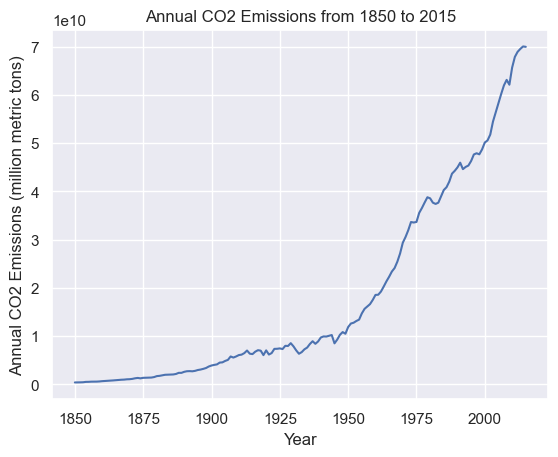

In [32]:
plt.plot(years, yearly_emissions)
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions (million metric tons)')
plt.title('Annual CO2 Emissions from 1850 to 2015')
plt.show()


#### 2. Scatter plot of annual land temperature and sea level over time

#### 3.

### Comparative analysis

*WIP*

### Advanced statistical analysis

*WIP*

## Results (Policy recommendations)

_The project will provide insights into the relationship between carbon emissions and climate change. The findings will be presented through data visualizations and conclusions drawn from the analysis._

### References

_The project will use various data sources and research papers to collect historical data and understand the impact of carbon emissions on climate change. These references will be cited in the project report._